# 常微分方程式の数値計算
## Juliaによる4次のRunge-Kutta 法の実装例

常微分方程式の初期値問題
$$ 
u'(t) = u^2 + 1, \quad u(0) = 0 
$$
を4次のRunge-Kutta法で解く．  

計算区間は$[0,T]$とし，$N$等分する．

In [1]:
f(t, u) = u^2 + 1   # 厳密解は u(t) = tan(t) + u(0)
u = 0
T = pi/4
N = 10
h = T/N

for i in 0:N-1
    t = h*i
    k1 = f(t, u) 
    k2 = f(t + h/2, u + h/2 * k1)
    k3 = f(t + h/2, u + h/2 * k2)
    k4 = f(t + h, u + h * k3)
    u += h/6 * (k1 + 2k2 + 2k3 + k4)

    println("u($(t+h)) = $u")
end

u(0.07853981633974483) = 0.0787016819812243
u(0.15707963267948966) = 0.15838439225994136
u(0.23561944901923448) = 0.24007869167661677
u(0.3141592653589793) = 0.32491961606901587
u(0.39269908169872414) = 0.4142134794912904
u(0.47123889803846897) = 0.5095253784942075
u(0.5497787143782138) = 0.6128007494641663
u(0.6283185307179586) = 0.7265425488476249
u(0.7068583470577035) = 0.8540807983615406
u(0.7853981633974483) = 1.000000233034054


## ベクトル値関数版

In [37]:
f(t, u) =[u[1]*(1-u[2]), -u[2]*(1-u[1])]

function rk4(f, U0;T, N)
    h = T/N
    U = U0
    Uhist = U
    for t in 0:h:T
        k1 = f(t, U)
        k2 = f(t+h/2, U+h/2*k1)
        k3 = f(t+h/2, U+h/2*k2)
        k4 = f(t+h, U+h*k3)
        U += h/6*(k1+2k2+2k3+k4)
        Uhist = hcat(Uhist, U)
    end
    return Uhist
end



rk4 (generic function with 3 methods)

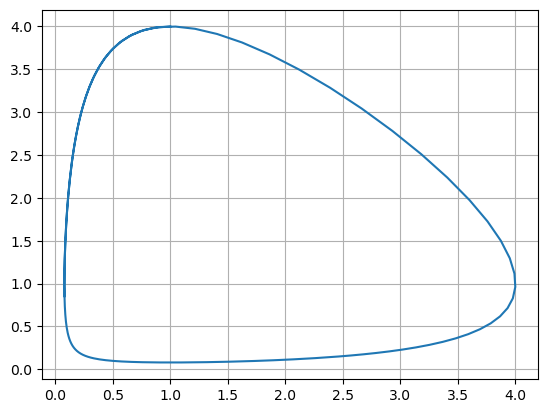

In [38]:
# グラフ描画
using PyPlot 
Uhist = rk4(f, [1, 4], T=10, N = 200)
cla()   # キャンバスクリア
plot(Uhist[1,:],Uhist[2,:],marker=nothing)
grid()
display(gcf())